In [83]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix



In [113]:
# fit a decision tree and obtain a cross-validation evaluation score
# evaluate model performance by cross-validation
df = pd.read_csv("GermanCredit.csv",sep=",")
X=df.loc[:, df.columns != 'Class']
y = df['Class'].map({'Good': 1, 'Bad': 0})
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=0)
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:

    clf = DecisionTreeClassifier(max_depth=depth,
                                 random_state=0)
    clf.fit(X_train, Y_train)
scores_dt = cross_val_score(clf, X_test, Y_test, cv=5, scoring='accuracy')
accuracy.append(scores_dt)
print(accuracy)

[array([0.56666667, 0.71666667, 0.56666667, 0.65      , 0.68333333])]


,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
105,24,11938,2,3,39,2,2,0,1,0,...,0,0,1,0,1,0,0,0,0,1
68,36,1819,4,4,37,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
479,15,1478,4,4,44,2,2,0,1,1,...,0,0,1,0,1,0,0,0,1,0
399,24,1516,4,1,43,2,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
434,9,2136,3,2,25,1,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,12,1082,4,4,48,2,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
192,27,3915,4,2,36,1,2,0,1,0,...,0,0,1,0,1,0,0,0,1,0
629,9,3832,1,4,64,1,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
559,18,1928,2,2,31,2,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0


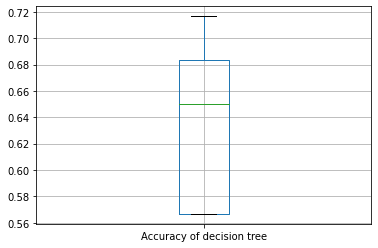

In [48]:
# draw a boxplot to visualise the classification performance
scores_df=pd.DataFrame(scores_dt,columns=['Accuracy of decision tree'])
boxplot=scores_df.boxplot()

Accuracy of the Pruned tree is: 0.7233333333333334
Test error rate of the Pruned tree is: 0.2766666666666666
AUC of the Pruned tree : 0.7159856552923277


DecisionTreeClassifier(max_depth=2, random_state=0)

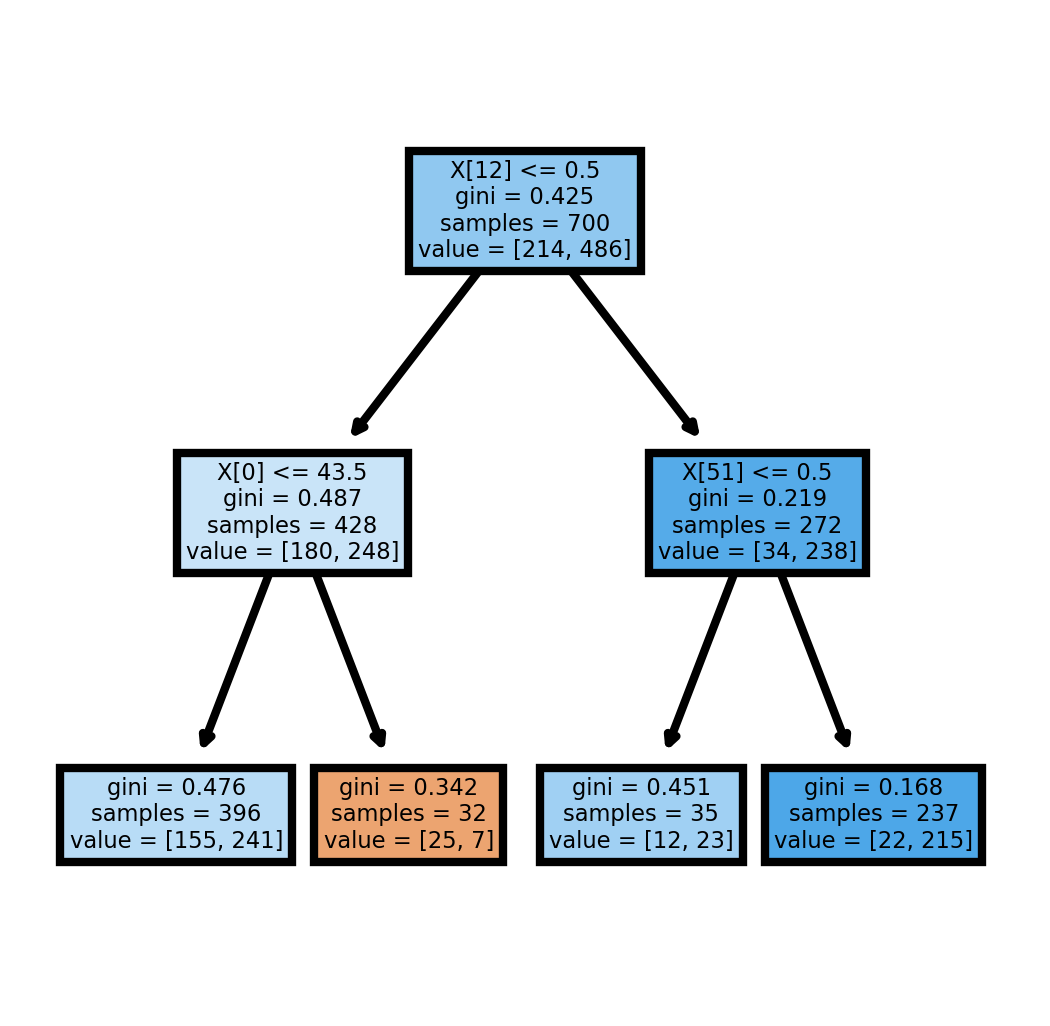

In [114]:
import matplotlib.pyplot as plt
from sklearn import tree
# visualise tree
clf = DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(X_train, Y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(clf,filled = True)
y_pred_proba = clf.predict_proba(X_test)[::, 1]
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy of the Pruned tree is:",accuracy)
print("Test error rate of the Pruned tree is:", 1-accuracy)
prune_fpr, prune_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(Y_test, y_pred_proba)
print("AUC of the Pruned tree :",auc1)


In [103]:
# fit a random forest and obtain a cross-validation evaluation score
rf = RandomForestClassifier(n_estimators=1000, max_features="sqrt",
                            bootstrap=True, oob_score=True, random_state=0)
# n_estimator is the number of trees,
# max_features is the number of features that are randomly selected to build the tree
# bootstrap and oob_score are to get the OOB evaluation
rf.fit(X_train, Y_train)
print(rf.oob_score_)
# evaluate model performance by cross-validation
scores_rf = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy')
print(scores_rf)
scores_rf.mean()
y_pred_proba = rf.predict_proba(X_test)[::,1]
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of the Random forest is:",accuracy)
print("Test error rate of the Random forest is:",1-accuracy)
forest_fpr, forest_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc2 = metrics.roc_auc_score(Y_test, y_pred_proba)
print("AUC of the Random forest is:",auc2)


0.7471428571428571
[0.75       0.75       0.81428571 0.76428571 0.78571429]
Accuracy of the Random forest is: 0.77
Test error rate of the Random forest is: 0.22999999999999998
AUC of the Random forest is: 0.7891762660291242


[0.07988748 0.10069503 0.03543387 0.0340694  0.08039573 0.01841278
 0.01120152 0.01688968 0.00366721 0.03874406 0.01764669 0.0084259
 0.05170041 0.0109028  0.01089552 0.01433876 0.00887872 0.02134654
 0.01830858 0.00916872 0.0135399  0.01379452 0.00181249 0.00474387
 0.00878421 0.0009952  0.00960666 0.00171426 0.02074283 0.00828299
 0.00549277 0.00521551 0.01345727 0.01506263 0.01493851 0.01132969
 0.01333973 0.00881181 0.00713915 0.0154528  0.01572505 0.00761363
 0.00947046 0.00666786 0.00766921 0.01552876 0.01362519 0.0147856
 0.01227116 0.01373317 0.00648535 0.01564698 0.01120077 0.01458417
 0.00706886 0.0025816  0.0118361  0.01567406 0.01256582]
[0.02375536 0.02787762 0.01369724 0.01287474 0.02215912 0.00913697
 0.00708888 0.00900034 0.00424242 0.02418361 0.0127825  0.00718809
 0.03359496 0.00937982 0.0093151  0.00839881 0.00676347 0.01181042
 0.00961743 0.00699317 0.00832215 0.00800598 0.00286122 0.00472071
 0.00648022 0.00209557 0.00742315 0.00290626 0.01084659 0.00637954
 0.0050

ValueError: No axis named 4 for object type Series

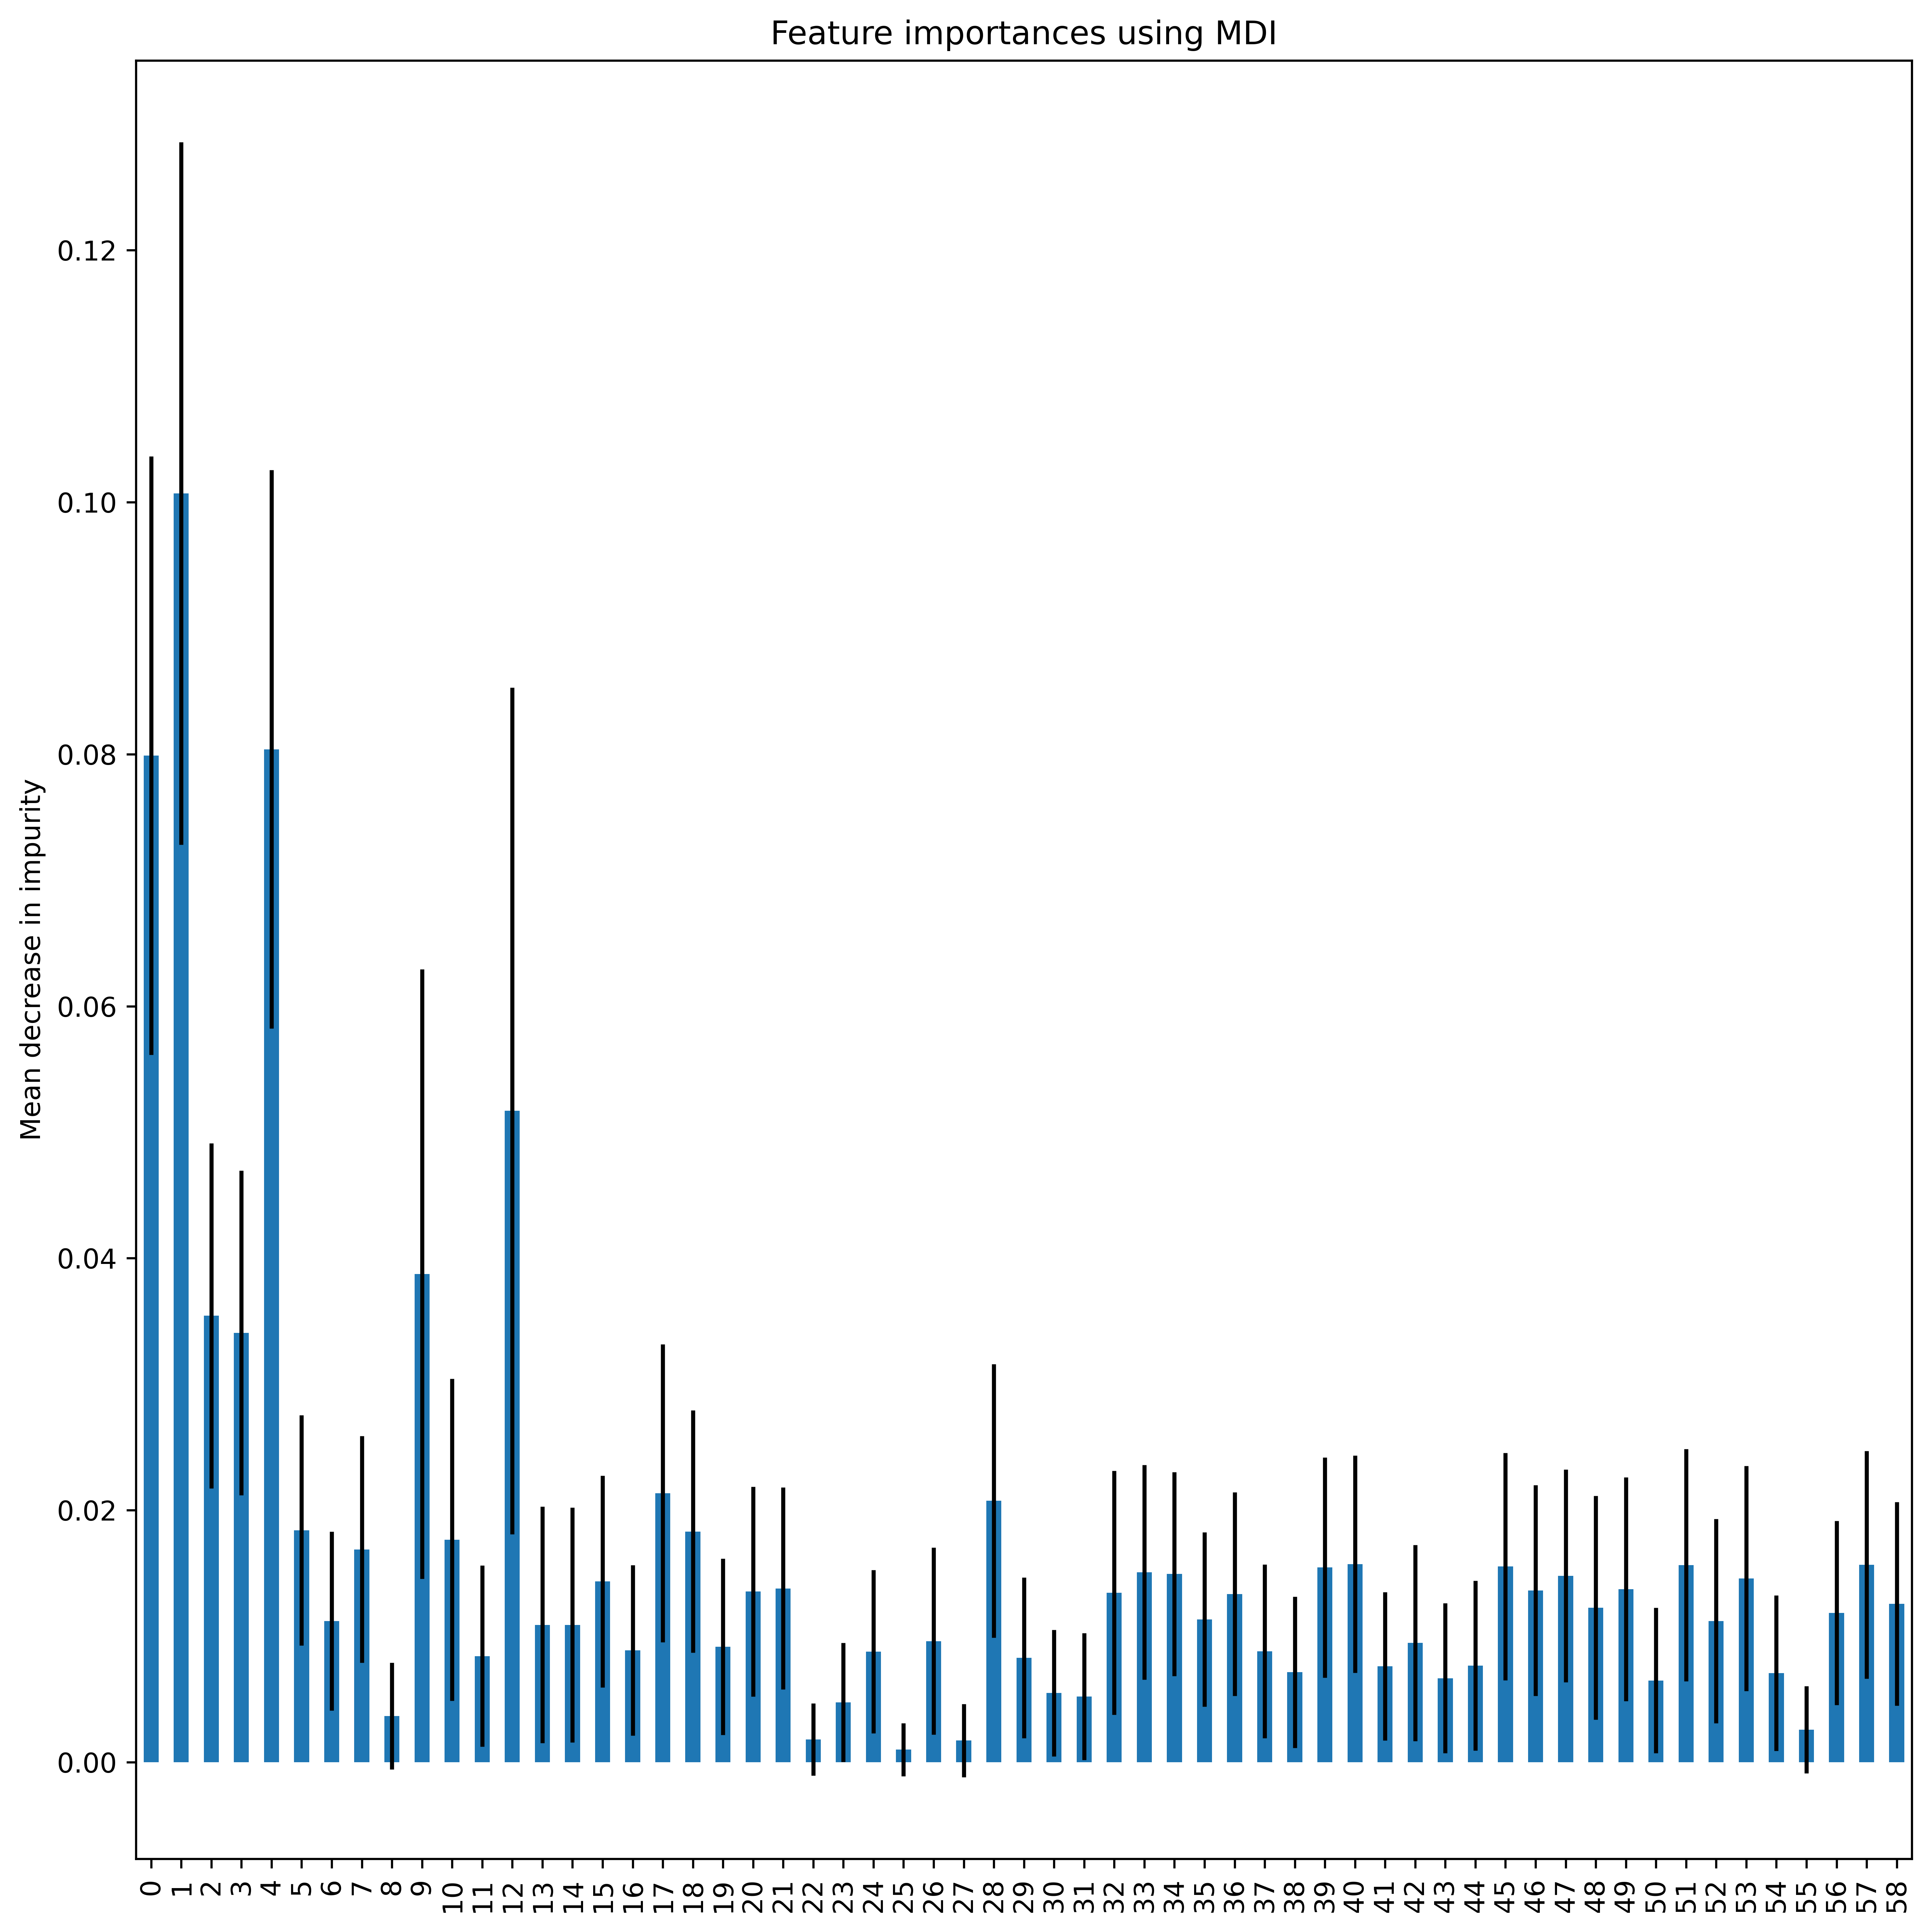

In [125]:
# get variable importance, e.g. mean decrease in gini index
rf_var = rf.fit(X, y)
importances = rf_var.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in rf_var.estimators_], axis=0)
print(importances)
print(std)
print()

forest_importances = pd.Series(importances)
print(forest_importances)

fig, ax = plt.subplots(figsize=(10,10),dpi=600)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
forest_importances

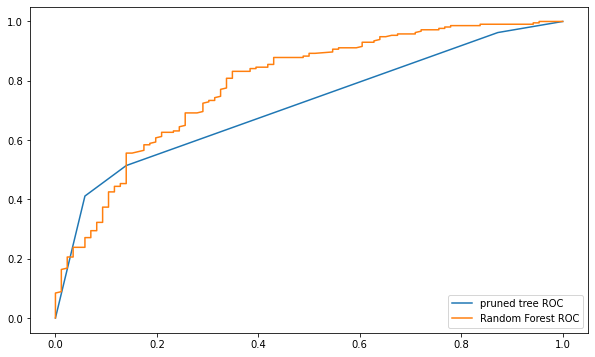

In [105]:
plt.figure(figsize=(10,6))
plt.plot(prune_fpr, prune_tpr, label="pruned tree ROC")

plt.plot(forest_fpr, forest_tpr, label="Random Forest ROC")
plt.legend(loc=4)

plt.show()


In [122]:
df[:12]

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0
5,36,9055,2,4,35,1,2,0,1,Good,...,0,0,1,0,0,1,0,1,0,0
6,24,2835,3,4,53,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
7,36,6948,2,2,35,1,1,0,1,Good,...,0,0,1,1,0,0,0,0,0,1
8,12,3059,2,4,61,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
9,30,5234,4,2,28,2,1,1,1,Bad,...,0,0,1,0,1,0,0,0,0,1
